In [1]:
"""
Autoencoder that aims to reconstruct original MNIST dataset.
Reduces dimensions of a 28*28=784 image to 2 (for visualisation purposes).
Example of unsupervised machine learning.
"""

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from google.colab import drive
import os

# Load mnist dataset and format data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((len(X_train), 28*28)) / 255.0
X_test = X_test.reshape((len(X_test), 28*28)) / 255.0

# Construct layers
input_dim = 28*28
latent_dim = 2
input_vec = Input(shape=(input_dim,))

elayer1 = Dense(392, activation='sigmoid') (input_vec)
elayer2 = Dense(28, activation='sigmoid') (elayer1)
elayer3 = Dense(10, activation='sigmoid') (elayer2)
encoder = Dense(latent_dim, activation='tanh') (elayer3)

dlayer1 = Dense(10, activation='sigmoid') (encoder)
dlayer2 = Dense(28, activation='sigmoid') (dlayer1)
dlayer3 = Dense(392, activation='sigmoid') (dlayer2)
decoder = Dense(input_dim, activation='sigmoid') (dlayer3)

# Build models
latent_encoder = Model(input_vec, encoder)
autoencoder = Model(input_vec, decoder)

# Train model
print("Training model...\n")
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
hist = autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, 
                       validation_data=(X_test, X_test))
print("\nDone training.")

# Save models
# drive.mount('/content/drive') # only if drive is not yet mounted
root = './drive/MyDrive/Colab Notebooks/autoencoder0'
latent_encoder.save(os.path.join(root, 'models/latent_encoder.h5'))
autoencoder.save(os.path.join(root, 'models/autoencoder.h5'))


11493376/11490434 [==============================] - 0s 0us/step
Training model...

Epoch 1/100
235/235 [==============================] - 8s 32ms/step - loss: 0.2758 - val_loss: 0.2633
Epoch 2/100
143/235 [=================>............] - ETA: 2s - loss: 0.2633

KeyboardInterrupt: ignored

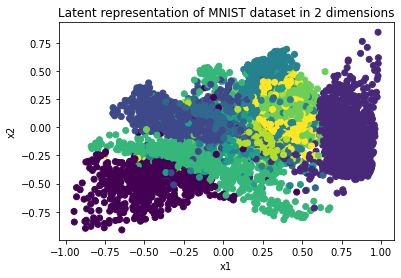

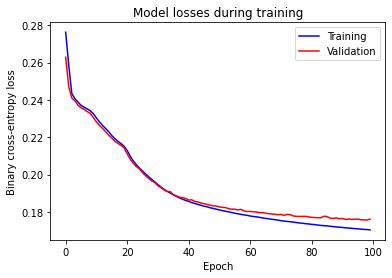

In [ ]:
""" Results analysis """

from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load models
root = './drive/MyDrive/Colab Notebooks/autoencoder0'
latent_encoder = load_model(os.path.join(root, 'models/latent_encoder.h5'))
autoencoder = load_model(os.path.join(root, 'models/autoencoder.h5'))


# Obtain latent representation (784 dimensions --> 2)
# Plot shows that some images are distinctly separable from the rest 
# while others may be more ambiguous
latent_repr = latent_encoder.predict(X_test)
plt.scatter(latent_repr[:,0], latent_repr[:,1], c=y_test)
plt.title("Latent representation of MNIST dataset in 2 dimensions")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# Plot loss against epoch
# Model loss converges as expected
plt.plot(hist.history['loss'], color='#0000ff')
plt.plot(hist.history['val_loss'], color='#ff0000')
plt.title("Model losses during training")
plt.xlabel("Epoch")
plt.ylabel("Binary cross-entropy loss")
plt.legend(['Training', 'Validation'])
plt.show()


# Use autoencoder model to predict input images
n = 10 # number of output images -- range (0, len(X_test))
predictions = autoencoder.predict(X_test)[:n]

# Reconstruct 28*28 image array with pixel values in range (0, 255)
predictions = predictions.reshape((len(predictions), 28, 28))
predictions = (predictions * 255).astype('uint8') 

# Save images in /predictions and /raw folders
# Images are saved as index(label).png
# eg. 001(7).png --> image 1 has target label 7
for idx, pred_array in enumerate(predictions):
    # Save predicted images
    pred_img = Image.fromarray(pred_array)
    pred_img.save(os.path.join(root, 'predictions', f'{idx:03}({y_test[idx]}).png'))
    
    # Save raw images
    raw_array = X_test[idx].reshape((28, 28))
    raw_array = (raw_array * 255).astype('uint8')
    raw_img = Image.fromarray(raw_array)
    raw_img.save(os.path.join(root, 'raw', f'{idx:03}({y_test[idx]}).png'))
